

## **Motivation**:

The overall motivation for this work is to accelerate the discovery of new materials that can solve the global challenge of renewable energy storage, the mechanism relies on predicting the relaxed state (structure and energy).

* * *
## **Dataset information**
Each Data object includes the following information for each corresponding system (assuming K atoms):

* `sid` - [1] System ID corresponding to each structure
* `edge_index` - [2 x  J] Graph connectivity with index 0 corresponding to neighboring atoms and index 1 corresponding to center atoms. J corresponds to the total edges as determined by a nearest neighbor search.
* `atomic_numbers` - [K x 1] Atomic numbers of all atoms in the system
* `pos` - [K x 3] Initial structure positional information of all atoms in the system (x, y, z cartesian coordinates)
* `natoms` - [1] Total number atoms in the system
* `cell` -  [3  x 3] System unit cell (necessary for periodic boundary condition (PBC) calculations)
* `cell_offsets` - [J x 3] offset matrix where each index corresponds to the unit cell offset necessary to find the corresponding neighbor in  `edge_index`. For example,  `cell_offsets[0, :] = [0,1,0]` corresponds to `edge_index[:, 0]= [1,0]` representing node 1 as node 0’s neighbor located one unit cell over in the +y direction.
* `tags` - [K x 1] Atomic tag information: 0 - Fixed, sub-surface atoms, 1 - Free, surface atoms 2 - Free, adsorbate atoms

Train/Val LMDBs additionally contain the following attributes:

* `y_init` - [1] Initial structure energy of the system
* `y_relaxed` - [1] Relaxed structure energy of the system (Energy distribution)
* `pos_relaxed` - [K x 3] Relaxed structure positional information of all atoms in the system (x, y, z cartesian coordinates)


*This LMDB (Lightning Memory-Mapped Database) file requires no additional processing and is ready to be used directly with the repository’s Datasets and DataLoaders.*


* * *
## Libraries & Modules

In [1]:
import importlib
import modules.understand_data
import modules.handle_data
import modules.chemical_eda
import modules.geometric_eda
import modules.data_integrity
import modules.energy_eda
import modules.visual_eda
import modules.visualization3d

importlib.reload(modules.understand_data)
importlib.reload(modules.handle_data)
importlib.reload(modules.chemical_eda)
importlib.reload(modules.geometric_eda)
importlib.reload(modules.data_integrity)
importlib.reload(modules.energy_eda)
importlib.reload(modules.visual_eda)
importlib.reload(modules.visualization3d)

/home/jepazminoc/.local/share/virtualenvs/h2-catalyst-ml-YLPsRO58/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'modules.visualization3d' from '/home/jepazminoc/h2-catalyst-ml/modules/visualization3d.py'>

In [2]:
from modules.understand_data import *
from modules.handle_data import load_df_data
from modules.chemical_eda import perform_chemical_eda
from modules.geometric_eda import perform_geometric_eda
from modules.data_integrity import load_and_validate_dataset
from modules.energy_eda import perform_energy_eda
from modules.visual_eda import *
from modules.visualization3d import *

In [3]:
dataset_path = '../data/is2res_train_val_test_lmdbs/data/is2re/10k/train/data.lmdb'

## Load dataset

In [4]:
data_df = load_df_data(dataset_path, 20)
data_df.head()

Loading data: 100%|██████████| 20/20 [00:00<00:00, 1431.67it/s]


,x,edge_index,edge_attr,pos,norm,face,cell,atomic_numbers,natoms,cell_offsets,force,distances,fixed,sid,tags,y_init,y_relaxed,pos_relaxed
0,None,"[[69, 83, 75, 35, 43, 37, 39, 5, 56, 45, 58, 2...",None,"[[7.0255556, 0.0, 12.73459], [6.9654884, 10.95...",None,None,"[[[11.832515, 0.0, -0.026398], [-3.0482295, 16...","[13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13....",86,"[[0, -1, 0], [0, 0, 0], [0, -1, 0], [0, -1, 0]...","[[0.07672916, 0.03236759, 0.5780765], [0.03831...","[2.811749, 2.811749, 2.811749, 2.8439174, 2.84...","[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",2472718,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...",6.282501,-0.025550,"[[7.0255556, 0.0, 12.73459], [6.872939, 10.890..."
1,None,"[[55, 63, 52, 48, 38, 33, 34, 15, 7, 4, 8, 3, ...",None,"[[5.3127055, 11.384256, 12.790607], [5.3127055...",None,None,"[[[12.750493, 0.0, 0.0], [3.1876233, 13.427562...","[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40....",85,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[-0.4060113, -0.16628616, -0.05275416], [-0.2...","[2.1678982, 2.1678982, 2.1678982, 2.198441, 2....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",1747243,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...",5.972082,-1.837069,"[[5.3127055, 11.384256, 12.790607], [5.3127055..."
2,None,"[[43, 88, 48, 59, 89, 38, 42, 35, 1, 20, 84, 3...",None,"[[0.47911805, 9.925274, 17.310055], [3.051076,...",None,None,"[[[14.120776, 0.0, -0.0], [-0.0, 20.132154, -1...","[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19....",114,"[[0, 0, 0], [-1, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0.10013931, -0.03330279, 0.13222352], [0.040...","[3.5385437, 3.5449479, 3.6219482, 3.6975377, 3...","[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...",1372820,"[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.497210,-0.423333,"[[0.6374, 9.757039, 17.570086], [3.051076, 10...."
3,None,"[[33, 60, 37, 40, 57, 52, 46, 9, 24, 30, 6, 4,...",None,"[[5.9132943, 5.589967, 15.358818], [2.5504537,...",None,None,"[[[13.451364, 0.0, -0.0], [-0.0, 8.205255, -0....","[44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44....",67,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0.10401902, -0.12071106, 0.28067988], [-0.22...","[2.4056926, 2.4337132, 2.4337134, 2.4337134, 2...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",504664,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, ...",9.608648,2.931869,"[[5.9132943, 5.589967, 15.358818], [2.5504537,..."
4,None,"[[38, 50, 36, 49, 43, 44, 55, 39, 7, 19, 5, 17...",None,"[[3.8807034, 2.665027, 15.419543], [0.0, 0.0, ...",None,None,"[[[11.642111, 0.0, -0.0], [3.8807034, 7.995081...","[23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23....",76,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0.01171777, 0.02433683, -0.2262483], [0.0031...","[2.6693335, 2.6693335, 2.6693335, 2.6693335, 2...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",592368,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",6.556396,-1.105795,"[[3.8807034, 2.665027, 15.419543], [0.0, 0.0, ..."


In [5]:
data_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               0 non-null      object 
 1   edge_index      20 non-null     object 
 2   edge_attr       0 non-null      object 
 3   pos             20 non-null     object 
 4   norm            0 non-null      object 
 5   face            0 non-null      object 
 6   cell            20 non-null     object 
 7   atomic_numbers  20 non-null     object 
 8   natoms          20 non-null     int64  
 9   cell_offsets    20 non-null     object 
 10  force           20 non-null     object 
 11  distances       20 non-null     object 
 12  fixed           20 non-null     object 
 13  sid             20 non-null     int64  
 14  tags            20 non-null     object 
 15  y_init          20 non-null     float64
 16  y_relaxed       20 non-null     float64
 17  pos_relaxed     20 non-null     object 
dtypes: 

In [6]:
pt_tensor = load_and_validate_dataset(dataset_path)

Phase 1: Loading & Fixing Tensors: 100%|██████████| 10000/10000 [00:06<00:00, 1449.63it/s]

Successfully loaded 10000 validated samples.


In [7]:
pt_tensor[0].keys()

['distances',
 'y_relaxed',
 'pos_relaxed',
 'cell_offsets',
 'cell',
 'y_init',
 'atomic_numbers',
 'force',
 'natoms',
 'fixed',
 'pos',
 'sid',
 'tags',
 'edge_index']

* * *
## Understand Data

I need to know what I have in each row. I know that there are vectors, but I need a visual representation to have a better idea.
So what I'm doing is creating a visual representation of two samples. 

### CPK color scheme:

- Red = Oxygen
- White = Hydrogen
- Grey = Carbon
- Blue = Nitrogen
- Orange/Brown = Copper, etc. (Metals have their own specific colors).

--- Comparing Samples 500 and 250 ---
Attribute                 | Sample 500                     | Sample 250                    
------------------------------------------------------------------------------------------
Formula                   | HHf18N2P2Re8                   | H2Mn32Ni32OSi32               
Energy (eV)               | -1.9667                        | -0.3474                       
Total Atoms               | 31                             | 99                            
Adsorbate Atoms           | 17                             | 72                            




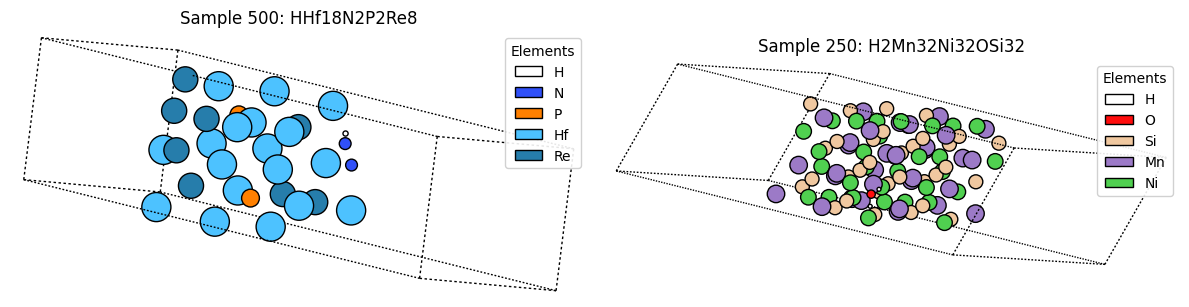

In [8]:
compare_samples(dataset_path, 500, 250)

* * *
## **EDA**

### **1.- Chemical & Distribution Analysis**

Here is where I understand what I'm going to simulate, basically there are three aspects:

* *Distribution of system sizes:* It represent how complex a graph/system (catalyst + adsorbate pairs) is. This tells me how much of the system is actually "moving" during the simulated relaxation.
* *Elemental Diversity:* Visualize the frequency of metals in the catalysts versus elements in the adsorbates (H, C, N, O).
* *Chemical diversity:* Active elements in the reaction. In the end the model needs to learn how these specific small molecules interact with the much larger metal surface.
* *Tag distribution:* Calculate the ratio of Fixed (0) [These are sub-surface atoms] vs. Free (1, 2) atoms. This tells me how much of the system is actually "moving" during the simulated relaxation.


**Summary:** In this phase, I need to verify the diversity of the catalysts and adsorbates to understand the domain of the model. I take a look at the Atomic Number distributions, map them to chemical symbols, and analyze the Tag system (Adsorbate vs. Surface vs. Subsurface).

Analyzing 10000 systems...


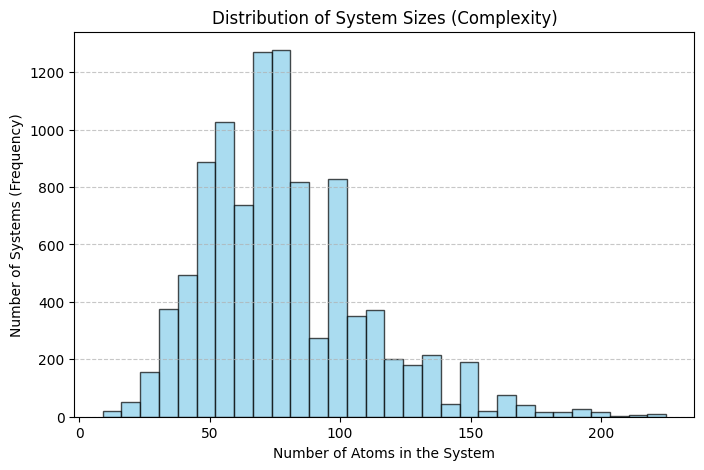

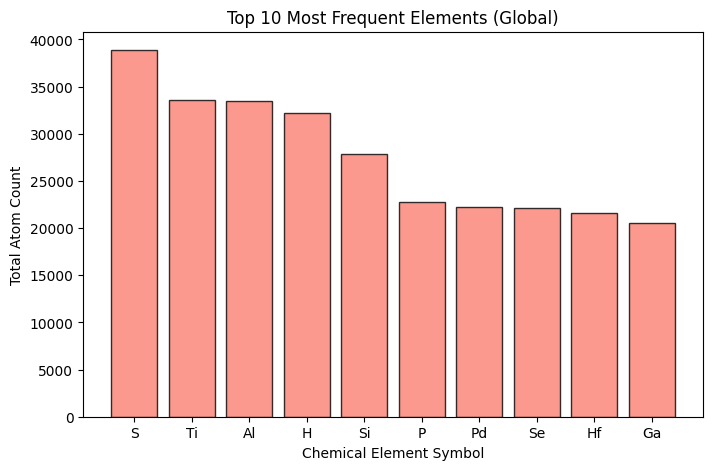

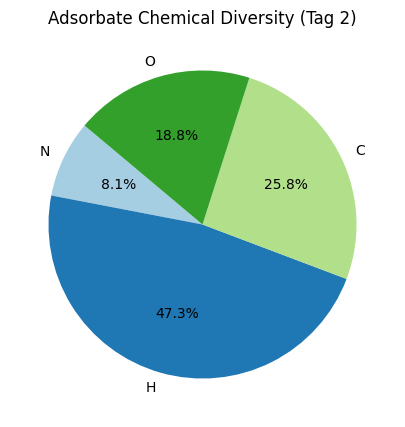

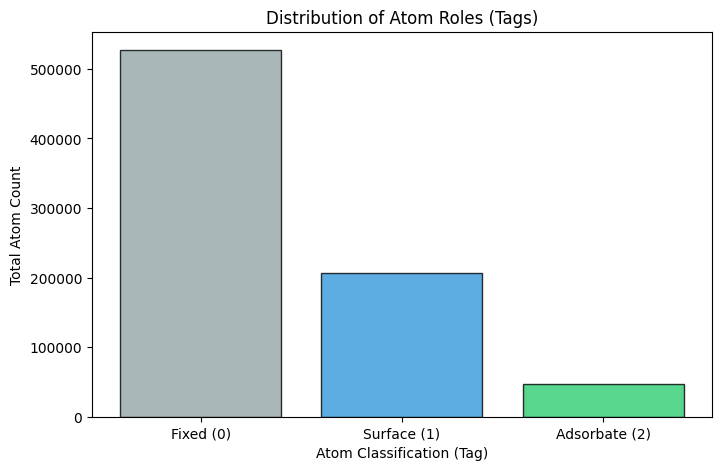


--- Summary ---
Elements Discovered: ['Ag', 'Al', 'As', 'Au', 'B', 'Bi', 'C', 'Ca', 'Cd', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Fe', 'Ga', 'Ge', 'H', 'Hf', 'Hg', 'In', 'Ir', 'K', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Ni', 'O', 'Os', 'P', 'Pb', 'Pd', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sn', 'Sr', 'Ta', 'Tc', 'Te', 'Ti', 'Tl', 'V', 'W', 'Y', 'Zn', 'Zr']
Vertical Axis Meaning:
 - System Sizes: Count of distinct catalyst+adsorbate systems.
 - Global Frequency: Absolute sum of atoms across all loaded systems.
 - Tag Distribution: Population of atoms categorized by their mobility (Fixed vs Free).


In [9]:
perform_chemical_eda(pt_tensor)

* * *
### **2.- Geometric & Graph Topology**

Since models like SchNet rely on distances and angles, I have to analyze the spatial relationships.
It provides a phisical idea of the atomic environment.

Calculating Geometric Properties for 10000 systems...


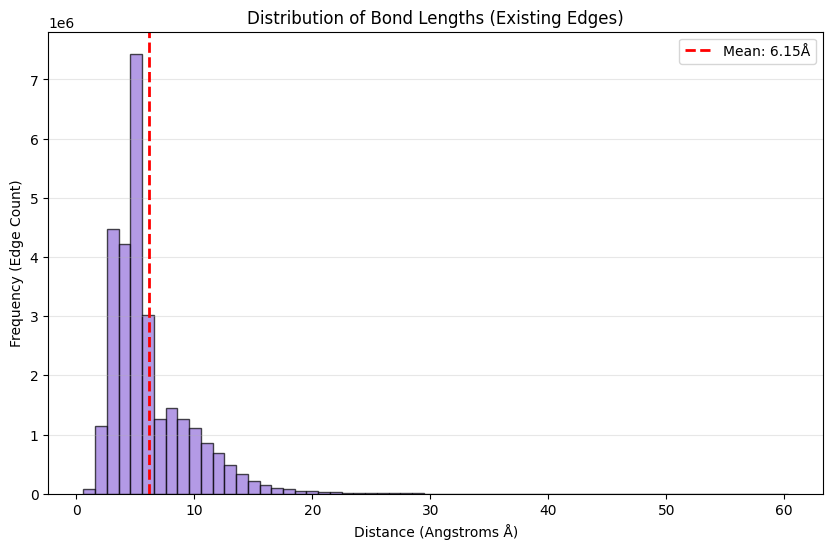

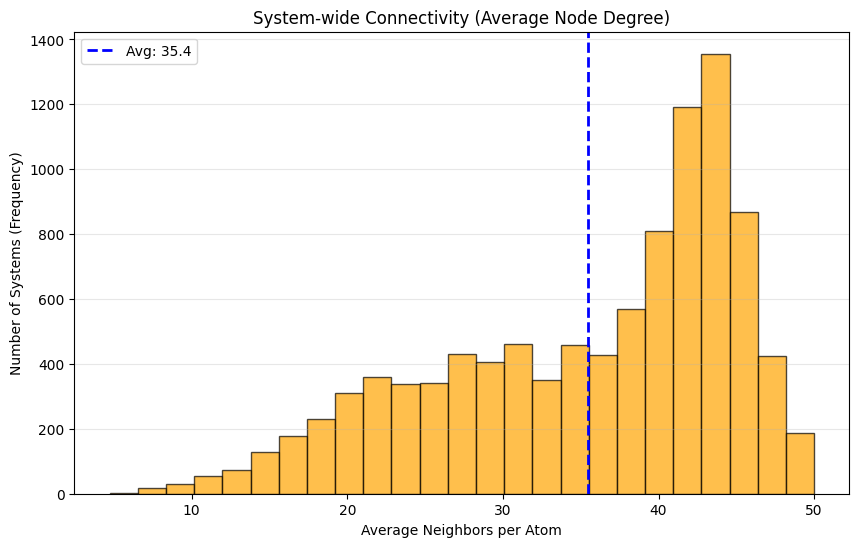


--- Geometric Summary ---
Total Edges Analyzed: 28613395
Global Mean Bond Length: 6.15 Å
Shortest Detected Bond: 0.60 Å
Longest Detected Bond: 60.32 Å
Global Average Neighbors: 35.45 per atom

---> Insights for Model Configuration ---
1. Cutoff Suggestion: Your longest edge is 60.32Å.
2. Graph Density: On average, each atom is connected to 35.4 others.
   High connectivity increases the number of message-passing operations.


In [10]:
perform_geometric_eda(pt_tensor)

### *Understand results*
They describe how the atoms are spaced and how dense the communication network is within each chemical system.
- *Graphic 1:* This chart tells me the physical distance between every pair of atoms that has an "edge" (a connection). The Vertical Axis is the *Edge Count*. It shows how many atom pairs in my dataset are separated by a specific distance.

- *Graphic 2:* This chart tells me how "crowded" or "dense" my graphs are. It measures the number of neighbors each atom has. The vertical axis tells me how many distict chemical structures have that average connectivity.


### *Summary*
**Computationally Expensive:** Because the average connectivity is 35.4, every time there is a "message passing" layer in mi model, each atom has to aggregate information from ~35 other nodes. This makes OCP models much more memory intensive.

**Cutoff Sensitivity:** If I build a model and set the cutoff radius to 5.0Å, I will delete the majority of the connections shown in the first plot (since the mean is 6.15Å). This may lead to poor energy predictions because the model would be "blind" to long-range interactions that are present in the data.

* * *
## 3.- Energy & Target Analysis

This analysis explores the relationship between the initial energy `y_init`, the target relaxed energy `y_relaxed`, and the resulting energy (`y_relaxed - y_init`). Understanding the distribution and scale of these values will help to decide which normalization strategies and evaluate the difficulty of my model will solve.

Extracting energy data from 10000 systems...


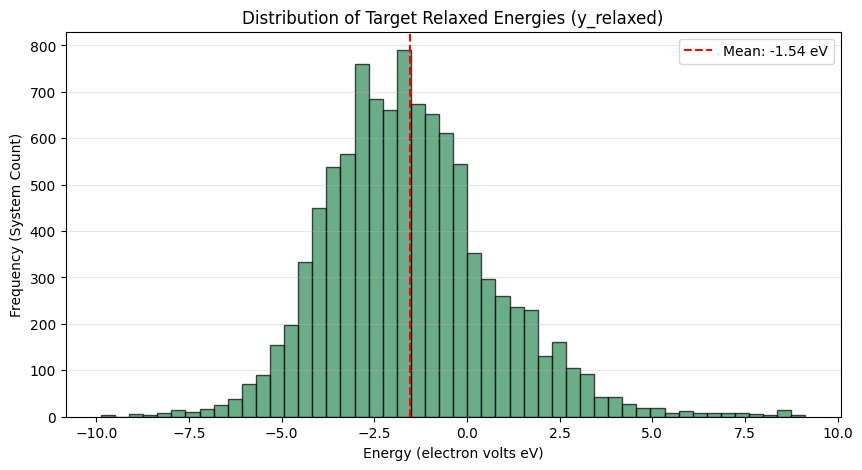

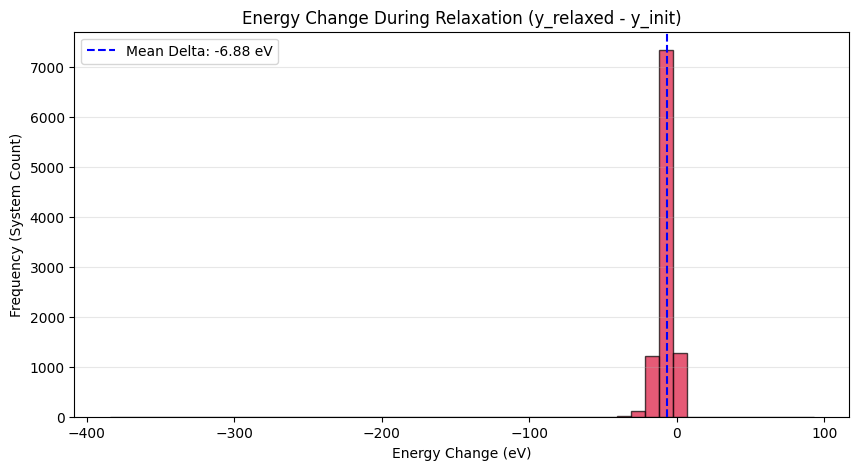

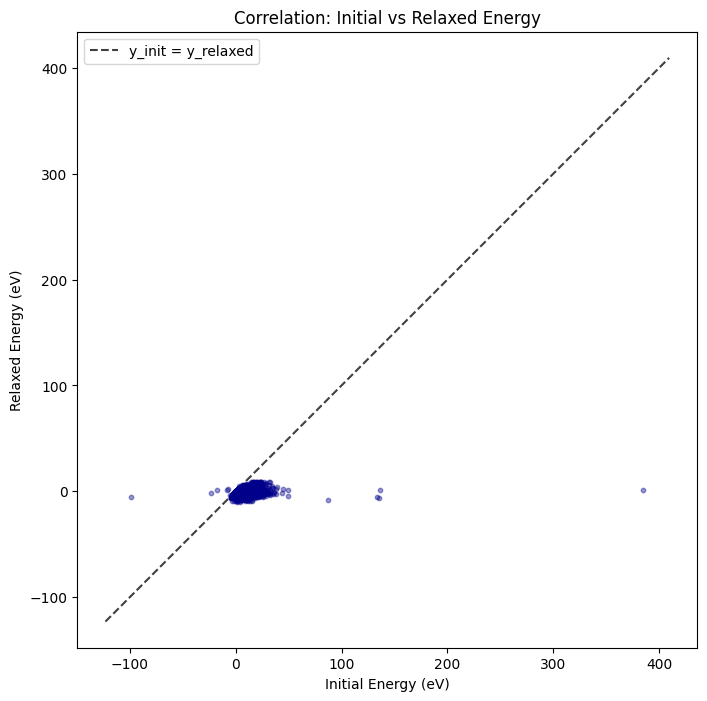


--- Energy EDA Summary ---
Total valid samples: 10000
Relaxed Energy Range: [-9.88, 9.13] eV
Avg Relaxation 'Drop': -6.8755 eV
Std Dev of Targets: 2.2782 eV


In [11]:
perform_energy_eda(pt_tensor)

### *Understand results*
- Graph 01 (`y_relaxed`): Most chemical systems are between -5 and 2 eV. If my model starts predicting values like -50 or +50, I know something is wrong.
- Graph 02 (`y_relaxed - y_init`): This is physically correct, chemical systems should lose energy to reach a relaxed state.
- Graph 03 (`Corelation`): Most of the blue dots are under `y_init=x_relaxed` line, that confirms the energy drop. Blue dots that are to far from cero can be consider ourliers.

### *Summary:*
- Relaxed Energy Range [-9.88, 9.13] eV: This tells me the diversity of my targets. The range goes from nearly 20 eV, It means my model should be sensitive to both highly stable (negative energy) and less stable (positive energy) configurations.

- Avg Relaxation 'Drop' (-6.88 eV): On average, the system's energy decreases by nearly 7 eV during the relaxation process. In physics, a lower energy state is a more stable state. This indicates that the "initial structures" in the dataset are often quite far from their equilibrium, and the model must learn the complex chemical relationship that leads to this stabilization.

- Std Dev of Targets (2.28 eV): This measures the "spread" of the data. The model needs to understand the specific catalyst-adsorbate interaction to make accurate predictions.

*The fact that the `Initial vs Relaxed energy` graph doesn't follow a simple linear trend means the relationship is non-linear and complex, so here is where I can use a Graph Neural Networks (GNNs).*



* * *
## 4.- Visual Inspection


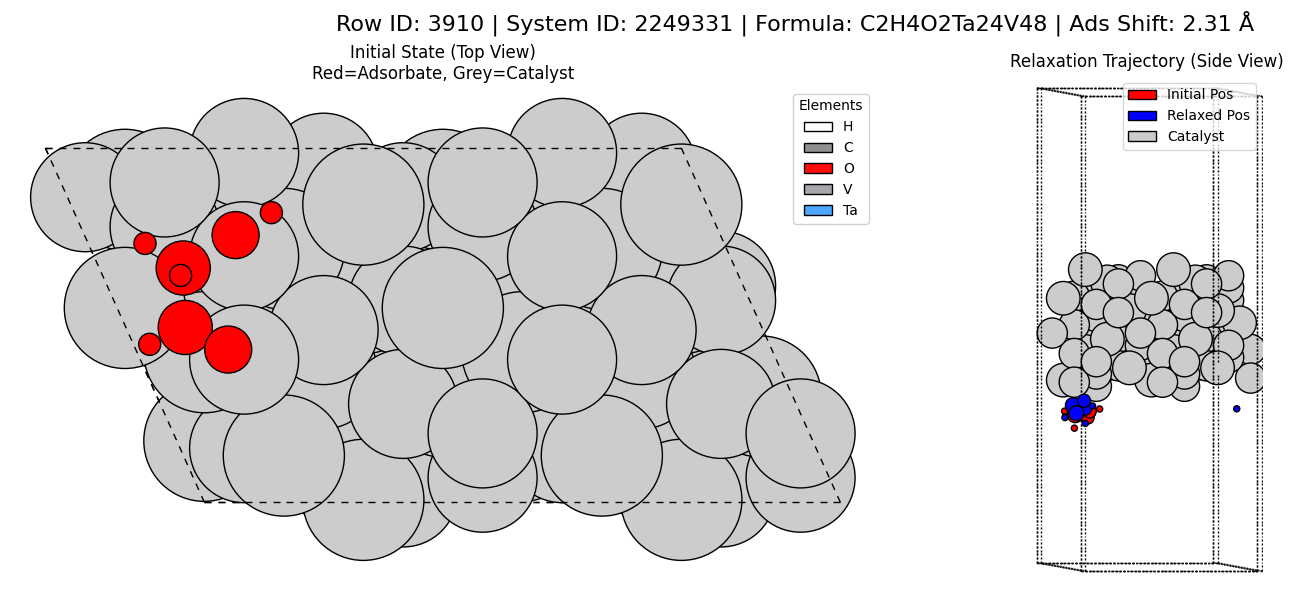

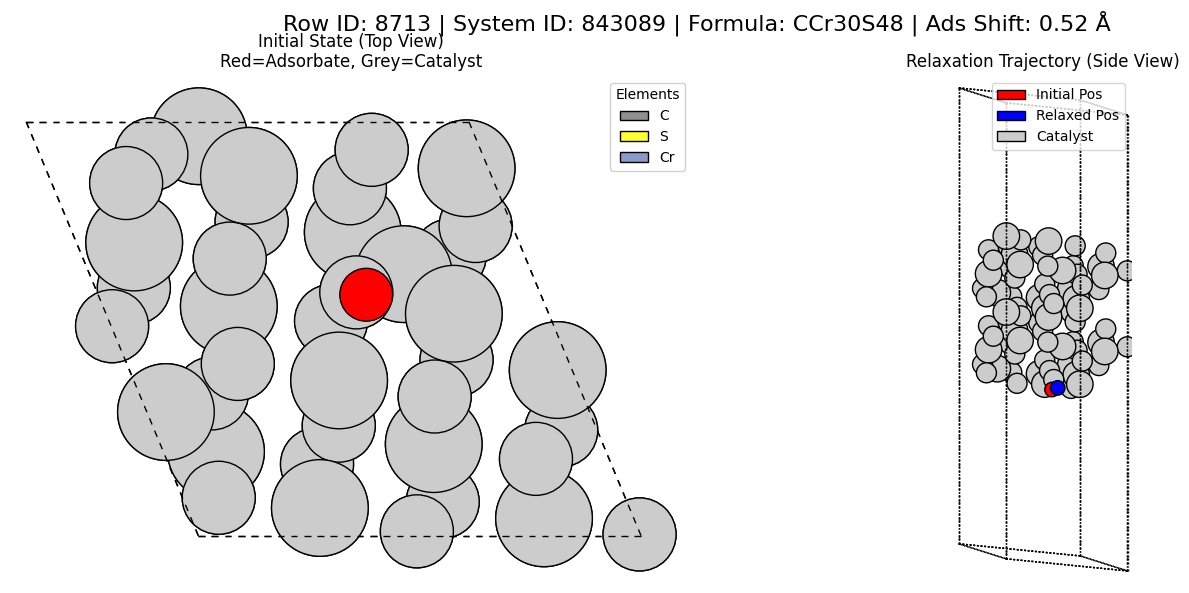

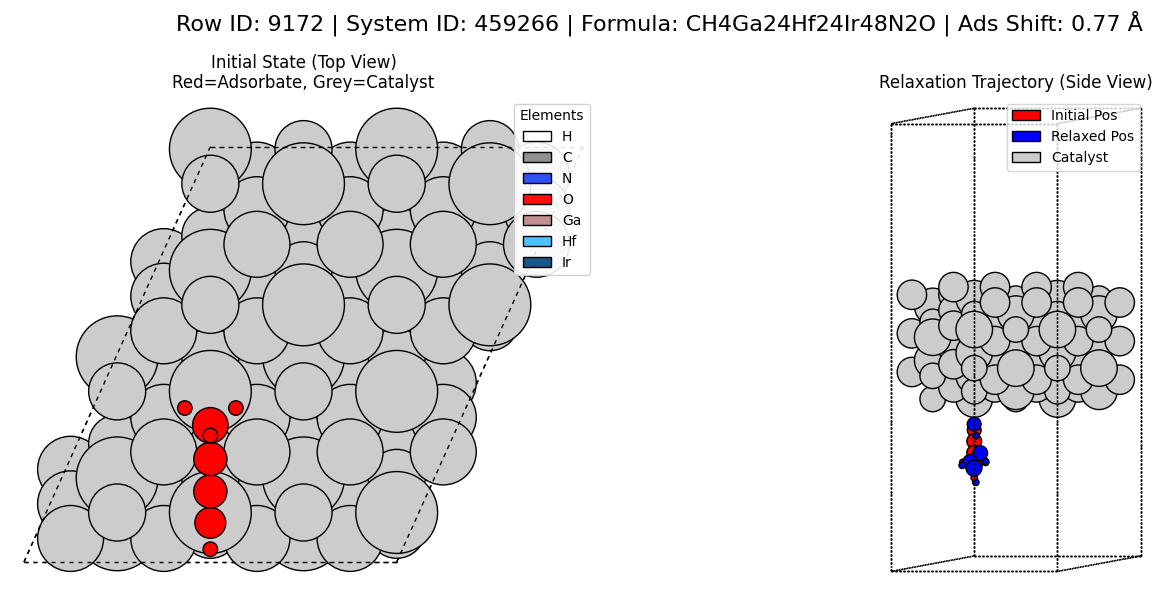

In [12]:
visualize_and_compare_relaxations(pt_tensor, 3)

In [13]:
visualize_interactive_relaxation(pt_tensor, 6544)

Interactive View for Sample 6544
Grey=Catalyst | Red(Transparent)=Initial Adsorbate | Blue=Relaxed Adsorbate | Yellow Line=Movement


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## **Load train and validation Datasets**

In [14]:
train_dataset_path = '../data/is2res_train_val_test_lmdbs/data/is2re/100k/train/data.lmdb'
val_dataset_path = '../data/is2res_train_val_test_lmdbs/data/is2re/all/val_id/data.lmdb'

train = load_and_validate_dataset(train_dataset_path, 32000)
validation = load_and_validate_dataset(val_dataset_path, 8000)

Phase 1: Loading & Fixing Tensors: 100%|██████████| 32000/32000 [00:20<00:00, 1555.26it/s]


Successfully loaded 32000 validated samples.


Phase 1: Loading & Fixing Tensors: 100%|██████████| 8000/8000 [00:21<00:00, 364.33it/s] 

Successfully loaded 8000 validated samples.


## **SchNet GNN Training**

In [15]:
import modules.SchNet_gnn
importlib.reload(modules.SchNet_gnn)
from modules.SchNet_gnn import *

In [16]:
model, train_maes, val_maes, val_loader, device, preds, targets = configure_and_run_training(train, validation, epochs=35, batch_size=128)

Starting Training on: cuda


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.86it/s]


Epoch 01 | Train MAE: 1.2653 eV | Val MAE: 1.1563 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.42it/s]


Epoch 02 | Train MAE: 1.1308 eV | Val MAE: 1.1135 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.86it/s]


Epoch 03 | Train MAE: 1.0843 eV | Val MAE: 1.0696 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.68it/s]


Epoch 04 | Train MAE: 1.0466 eV | Val MAE: 1.0394 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.28it/s]


Epoch 05 | Train MAE: 1.0240 eV | Val MAE: 1.0173 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.61it/s]


Epoch 06 | Train MAE: 1.0104 eV | Val MAE: 1.0019 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.57it/s]


Epoch 07 | Train MAE: 0.9815 eV | Val MAE: 1.0065 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.94it/s]


Epoch 08 | Train MAE: 0.9726 eV | Val MAE: 0.9993 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.64it/s]


Epoch 09 | Train MAE: 0.9520 eV | Val MAE: 0.9945 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.98it/s]


Epoch 10 | Train MAE: 0.9332 eV | Val MAE: 0.9726 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.49it/s]


Epoch 11 | Train MAE: 0.9174 eV | Val MAE: 0.9763 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.60it/s]


Epoch 12 | Train MAE: 0.9026 eV | Val MAE: 0.9739 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.08it/s]


Epoch 13 | Train MAE: 0.8772 eV | Val MAE: 0.9509 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.94it/s]


Epoch 14 | Train MAE: 0.8610 eV | Val MAE: 0.9473 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.82it/s]


Epoch 15 | Train MAE: 0.8472 eV | Val MAE: 0.9313 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.08it/s]


Epoch 16 | Train MAE: 0.8256 eV | Val MAE: 0.9587 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.24it/s]


Epoch 17 | Train MAE: 0.8121 eV | Val MAE: 0.9363 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.21it/s]


Epoch 18 | Train MAE: 0.7930 eV | Val MAE: 0.9363 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.70it/s]


Epoch 19 | Train MAE: 0.7225 eV | Val MAE: 0.9222 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.59it/s]


Epoch 20 | Train MAE: 0.6853 eV | Val MAE: 0.9258 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.80it/s]


Epoch 21 | Train MAE: 0.6644 eV | Val MAE: 0.9260 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.28it/s]


Epoch 22 | Train MAE: 0.6398 eV | Val MAE: 0.9204 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.42it/s]


Epoch 23 | Train MAE: 0.6192 eV | Val MAE: 0.9366 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.35it/s]


Epoch 24 | Train MAE: 0.6032 eV | Val MAE: 0.9587 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.77it/s]


Epoch 25 | Train MAE: 0.5855 eV | Val MAE: 0.9382 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.82it/s]


Epoch 26 | Train MAE: 0.5262 eV | Val MAE: 0.9333 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.89it/s]


Epoch 27 | Train MAE: 0.4908 eV | Val MAE: 0.9440 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.29it/s]


Epoch 28 | Train MAE: 0.4711 eV | Val MAE: 0.9449 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.40it/s]


Epoch 29 | Train MAE: 0.4314 eV | Val MAE: 0.9503 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.47it/s]


Epoch 30 | Train MAE: 0.4077 eV | Val MAE: 0.9490 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.80it/s]


Epoch 31 | Train MAE: 0.3935 eV | Val MAE: 0.9547 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.59it/s]


Epoch 32 | Train MAE: 0.3710 eV | Val MAE: 0.9589 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 26.55it/s]


Epoch 33 | Train MAE: 0.3570 eV | Val MAE: 0.9602 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.09it/s]


Epoch 34 | Train MAE: 0.3490 eV | Val MAE: 0.9586 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 27.14it/s]


Epoch 35 | Train MAE: 0.3356 eV | Val MAE: 0.9600 eV


## **PaiNN GNN Training**

In [17]:
import modules.PaiNN_gnn
importlib.reload(modules.PaiNN_gnn)
from modules.PaiNN_gnn import *

In [18]:
p_model, p_train_maes, p_val_maes, p_val_loader, p_device, p_preds, p_targets = configure_and_run_painn_training(train, validation, epochs=20, batch_size=32, lr=0.0005)

Initializing PaiNN on cuda...


PaiNN Training: 100%|██████████| 1000/1000 [00:13<00:00, 72.36it/s]


Epoch 1 | Train MAE: 1.2845 | Val MAE: 1.1219


PaiNN Training: 100%|██████████| 1000/1000 [00:14<00:00, 71.41it/s]


Epoch 2 | Train MAE: 1.0263 | Val MAE: 0.9931


PaiNN Training: 100%|██████████| 1000/1000 [00:13<00:00, 71.72it/s]


Epoch 3 | Train MAE: 0.9387 | Val MAE: 0.9400


PaiNN Training: 100%|██████████| 1000/1000 [00:13<00:00, 72.83it/s]


Epoch 4 | Train MAE: 0.8913 | Val MAE: 0.8862


PaiNN Training: 100%|██████████| 1000/1000 [00:13<00:00, 73.05it/s]


Epoch 5 | Train MAE: 0.8456 | Val MAE: 0.8657


PaiNN Training: 100%|██████████| 1000/1000 [00:13<00:00, 71.92it/s]


Epoch 6 | Train MAE: 0.8125 | Val MAE: 0.9042


PaiNN Training: 100%|██████████| 1000/1000 [00:14<00:00, 71.38it/s]


Epoch 7 | Train MAE: 0.7837 | Val MAE: 0.8526


PaiNN Training: 100%|██████████| 1000/1000 [00:13<00:00, 71.98it/s]


Epoch 8 | Train MAE: 0.7486 | Val MAE: 0.8614


PaiNN Training: 100%|██████████| 1000/1000 [00:13<00:00, 73.00it/s]


Epoch 9 | Train MAE: 0.7269 | Val MAE: 0.8660


PaiNN Training: 100%|██████████| 1000/1000 [00:13<00:00, 72.59it/s]


Epoch 10 | Train MAE: 0.6970 | Val MAE: 0.8552


PaiNN Training: 100%|██████████| 1000/1000 [00:14<00:00, 71.38it/s]


Epoch 11 | Train MAE: 0.6098 | Val MAE: 0.8357


PaiNN Training: 100%|██████████| 1000/1000 [00:13<00:00, 71.86it/s]


Epoch 12 | Train MAE: 0.5619 | Val MAE: 0.8506


PaiNN Training: 100%|██████████| 1000/1000 [00:13<00:00, 73.03it/s]


Epoch 13 | Train MAE: 0.5290 | Val MAE: 0.8722


PaiNN Training: 100%|██████████| 1000/1000 [00:13<00:00, 73.42it/s]


Epoch 14 | Train MAE: 0.5001 | Val MAE: 0.8635


PaiNN Training: 100%|██████████| 1000/1000 [00:13<00:00, 72.25it/s]


Epoch 15 | Train MAE: 0.4414 | Val MAE: 0.8422


PaiNN Training: 100%|██████████| 1000/1000 [00:13<00:00, 71.60it/s]


Epoch 16 | Train MAE: 0.4008 | Val MAE: 0.8491


PaiNN Training: 100%|██████████| 1000/1000 [00:13<00:00, 72.53it/s]


Epoch 17 | Train MAE: 0.3780 | Val MAE: 0.8462


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 63.89it/s]


Epoch 18 | Train MAE: 0.3401 | Val MAE: 0.8481


PaiNN Training: 100%|██████████| 1000/1000 [00:17<00:00, 58.81it/s]


Epoch 19 | Train MAE: 0.3146 | Val MAE: 0.8495


PaiNN Training: 100%|██████████| 1000/1000 [00:17<00:00, 57.63it/s]


Epoch 20 | Train MAE: 0.3000 | Val MAE: 0.8489


## **Results** ● **SchNet**

In [19]:
import modules.results
importlib.reload(modules.results)
from modules.results import *

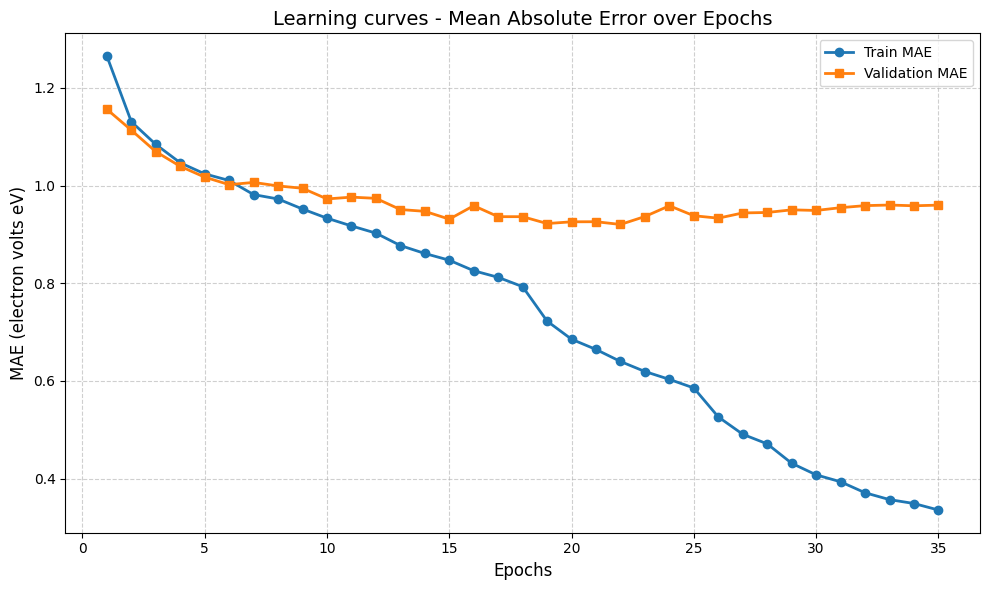

In [20]:
plot_training_curves(train_maes, val_maes)

In [21]:
preds, targets = get_predictions_and_targets(model, val_loader, device, get_model_output)
summarize_model_metrics(preds, targets)


--- Model Performance Summary (Validation) ---
Total Samples:      8000
Mean Absolute Error (MAE):  0.9600 eV
Root Mean Sq. Error (RMSE): 1.3628 eV
R-squared (R²):             0.6450
Median Absolute Error:      0.6934 eV
---------------------------------------------


- MAE of 0.9672 eV indicates that while the model has learned the general energy trends, it is still far from the "Chemical Accuracy" (0.02 eV). 

- RMSE (1.3754 eV) is higher than the MAE. This mathematical gap confirms that the model is making very large errors on specific "difficult" systems (likely rare metals or complex molecules), which pulls the average error up.

- R^2 of 0.59 suggests the model understands the "big picture" (e.g., larger systems have more energy), but it is struggling to capture the variance that comes from more complex structures.

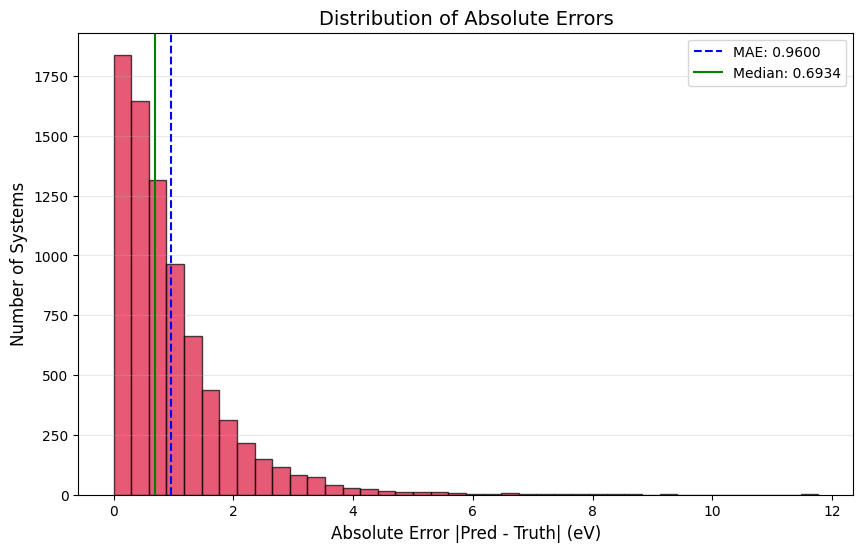

In [22]:
plot_error_distribution(preds, targets)

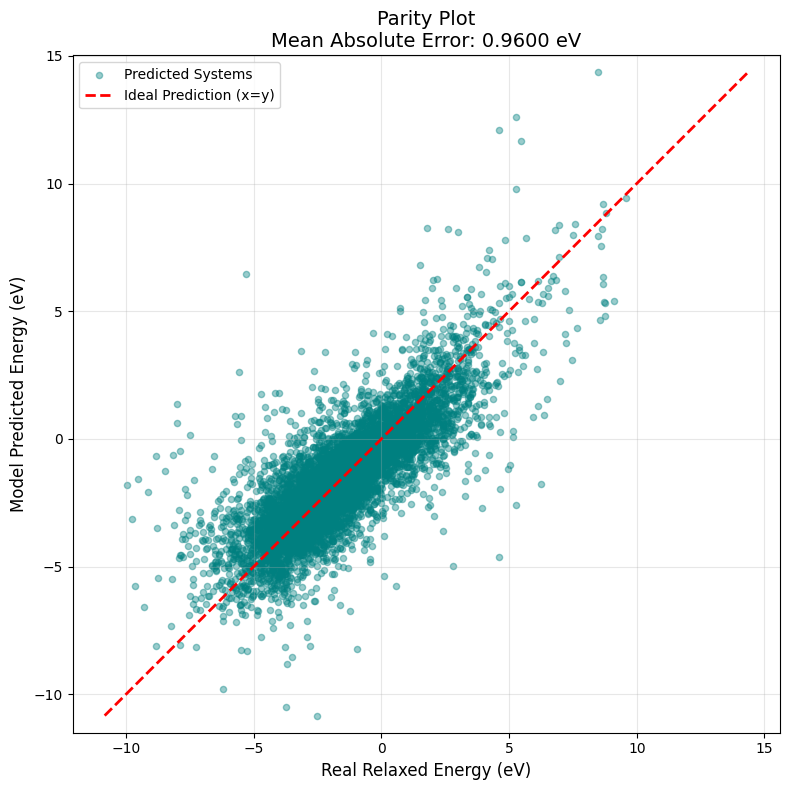

In [23]:
plot_parity_results(preds, targets)

## **Results** ● **PaiNN**

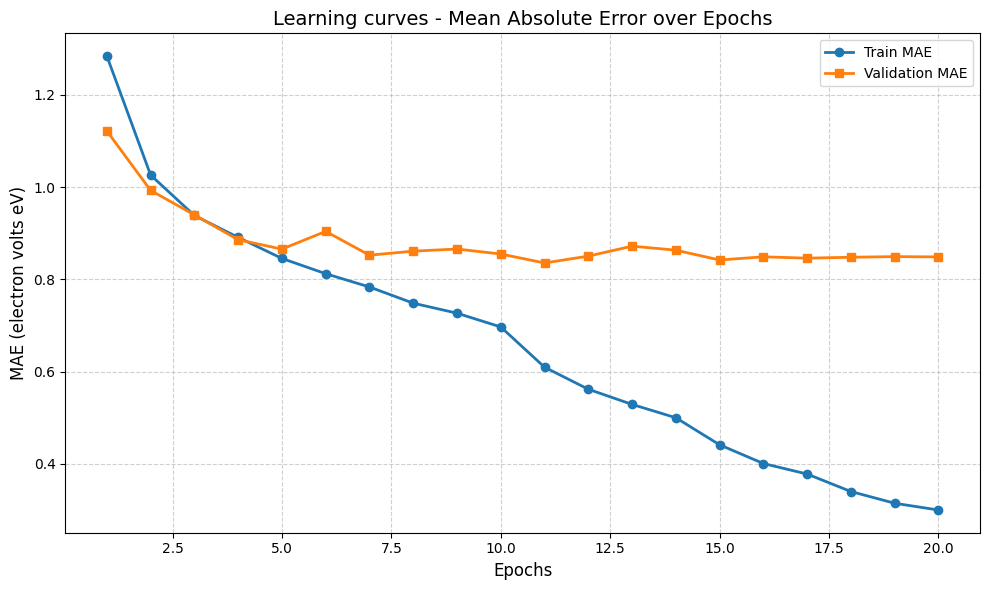

In [24]:
plot_training_curves(p_train_maes, p_val_maes)

In [25]:
summarize_model_metrics(p_preds, p_targets)


--- Model Performance Summary (Validation) ---
Total Samples:      8000
Mean Absolute Error (MAE):  0.8489 eV
Root Mean Sq. Error (RMSE): 1.2274 eV
R-squared (R²):             0.7120
Median Absolute Error:      0.5968 eV
---------------------------------------------


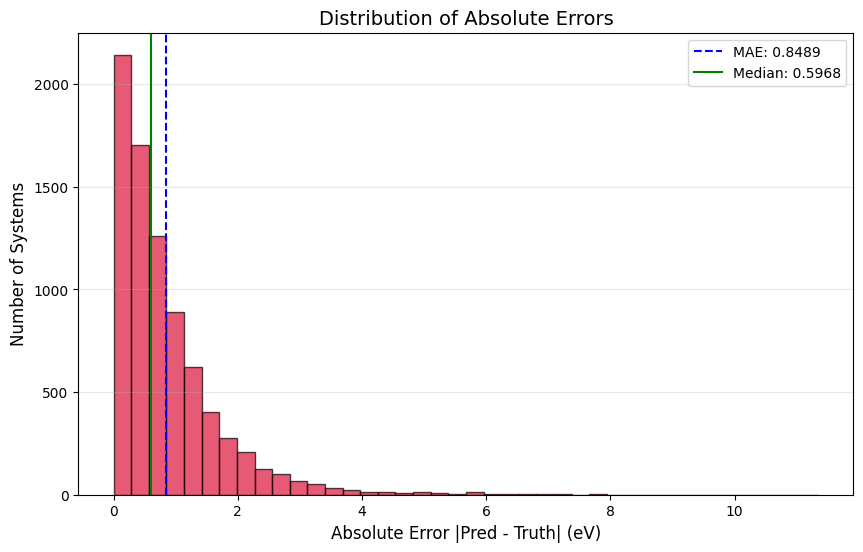

In [26]:
plot_error_distribution(p_preds, p_targets)

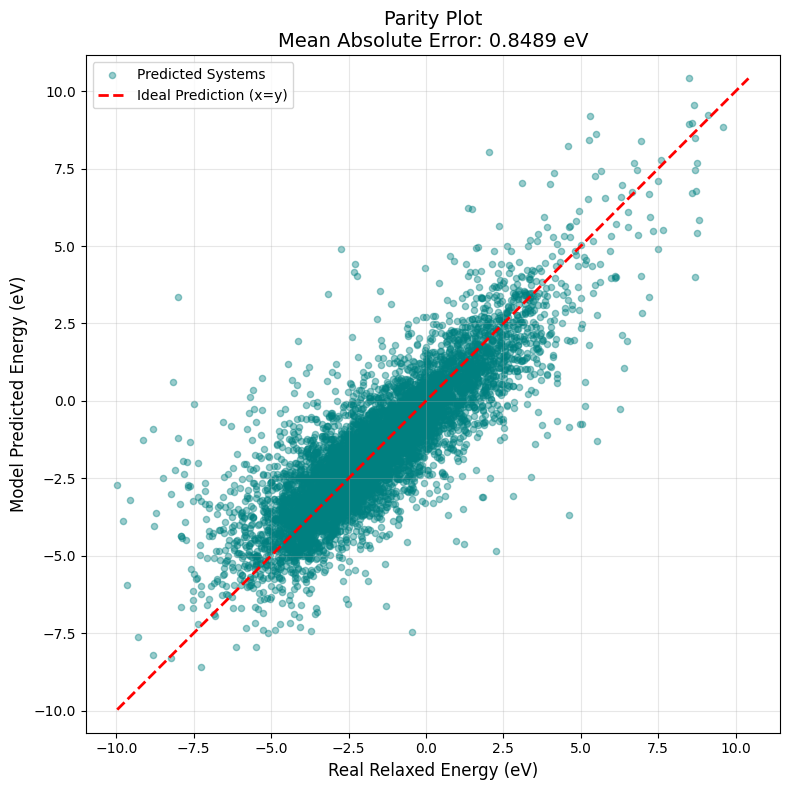

In [27]:
plot_parity_results(p_preds, p_targets)

## **Conclusions**

In conclusion SchNet captures global stabilitation trends but it is not able to get better results because it is a "Distance-only" GNN. It is based on Euclidean distances between atoms, but it doesn't understand angles, directions or interations between Atoms. As a consecuence it is necessary to experiment with different and more advance GNN that capture bring better predictions.


#### **Source**

[1] An Introduction to Electrocatalyst Design using Machine Learning for Renewable Energy Storage<br>
    https://arxiv.org/abs/2010.09435

[2] SchNet: A continuous-filter convolutional neural network for modeling quantum interactions<br>
https://arxiv.org/abs/1706.08566

